In [0]:
#imports for keras
%tensorflow_version 1.x
import keras
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam 
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [0]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# CNN IMAGE LOADING

In [0]:
train_path = '/content/croppedImages1/train'
test_path = '/content/croppedImages1/test'
valid_path = '/content/croppedImages1/valid'

In [24]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(450,450),classes=['benign','malignant'],batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(450,450),classes=['benign','malignant'],batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(450,450),classes=['benign','malignant'],batch_size=10)

Found 619 images belonging to 2 classes.
Found 156 images belonging to 2 classes.
Found 195 images belonging to 2 classes.


In [0]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [0]:
imgs, labels = next(train_batches)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


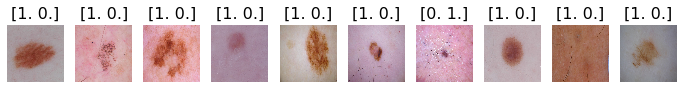

In [27]:
plots(imgs, titles=labels)

# BUILD AND TRAIN

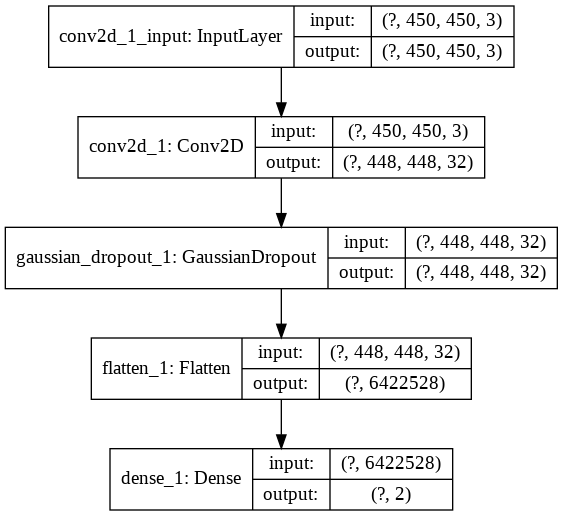

In [28]:
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(450,450,3)),
    keras.layers.GaussianDropout(.3),
    keras.layers.Flatten(),
    keras.layers.Dense(2,activation='softmax')
])
plot_model(cnn_model, show_shapes='True', show_layer_names='True', expand_nested='True')


In [29]:
cnn_model.compile(Adam(lr=.0001),loss='mean_squared_error', metrics=['accuracy'])

In [30]:
cnn_model.fit_generator(train_batches,steps_per_epoch=75,validation_data=valid_batches,validation_steps=15, epochs=50,verbose=1)




Epoch 1/50





75/75 [==============================] - 26s 344ms/step - loss: 0.1416 - acc: 0.8584 - val_loss: 0.0933 - val_acc: 0.9067
Epoch 2/50
75/75 [==============================] - 11s 152ms/step - loss: 0.1241 - acc: 0.8759 - val_loss: 0.0690 - val_acc: 0.9310
Epoch 3/50
75/75 [==============================] - 11s 151ms/step - loss: 0.1404 - acc: 0.8596 - val_loss: 0.0828 - val_acc: 0.9172
Epoch 4/50
75/75 [==============================] - 11s 149ms/step - loss: 0.1267 - acc: 0.8733 - val_loss: 0.0828 - val_acc: 0.9172
Epoch 5/50
75/75 [==============================] - 11s 149ms/step - loss: 0.1308 - acc: 0.8692 - val_loss: 0.0867 - val_acc: 0.9133
Epoch 6/50
75/75 [==============================] - 11s 153ms/step - loss: 0.1388 - acc: 0.8612 - val_loss: 0.0690 - val_acc: 0.9310
Epoch 7/50
75/75 [==============================] - 11s 151ms/step - loss: 0.1213 - acc: 0.8787 - val_loss: 0.1103 - val_acc: 0.8897
Epoch 8/50
75/75 [==============================] - 11s 149ms

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


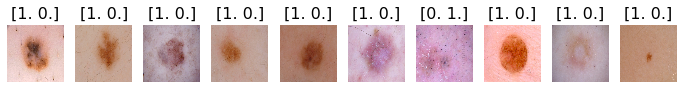

In [31]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs,titles=test_labels)

In [32]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1.], dtype=float32)

In [33]:
predictions = cnn_model.predict_generator(test_batches,steps=20,verbose=1)

20/20 [==============================] - 1s 71ms/step
